In [38]:
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import math

from keras.callbacks import EarlyStopping
from keras.models import Sequential

from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import Dropout
from sklearn.model_selection import train_test_split

import tensorflow.keras.backend as K

In [39]:
dataset = pd.read_csv("Datasets1/combined_report_Kumanovo.csv")

In [40]:
dataset = dataset.drop(columns = ["ozone", "precipAccumulation", "precipIntensity", "precipProbability", "pressure", "visibility", "CO", "PM10", "O3", "PM25", "SO2", "AQI"])

In [41]:
dataset_bez_stringovi = dataset.drop(columns = ["icon", "precipType", "summary"])

In [42]:
dataset_bez_stringovi

,apparentTemperature,cloudCover,dewPoint,humidity,temperature,time,uvIndex,windBearing,windGust,windSpeed,NO2
0,5.79,1.00,6.78,0.60,18.22,1420106400,0.0,30.0,2.01,11.39,6.1693
1,12.42,1.00,6.78,0.52,21.83,1420110000,0.0,30.0,2.01,8.05,6.1693
2,10.94,1.00,8.58,0.56,21.83,1420117200,0.0,30.0,2.01,10.29,6.1693
3,8.05,1.00,10.41,0.66,20.02,1420120800,0.0,30.0,2.01,11.39,6.1693
4,1.63,1.00,6.78,0.65,16.42,1420128000,0.0,30.0,2.01,14.99,6.1693
...,...,...,...,...,...,...,...,...,...,...,...
22095,40.92,0.17,28.00,0.60,40.92,1546002000,1.0,286.0,7.09,0.73,34.3609
22096,42.81,0.35,28.26,0.56,42.81,1546005600,0.0,283.0,5.07,2.94,32.0307
22097,39.54,0.48,28.37,0.64,39.54,1546009200,0.0,329.0,3.70,0.68,27.9242
22098,34.36,0.54,28.29,0.78,34.36,1546012800,0.0,78.0,3.67,2.90,27.9242


In [43]:
train_dataset = dataset_bez_stringovi[:-2000]

In [44]:
train_dataset

,apparentTemperature,cloudCover,dewPoint,humidity,temperature,time,uvIndex,windBearing,windGust,windSpeed,NO2
0,5.79,1.00,6.78,0.60,18.22,1420106400,0.0,30.0,2.01,11.39,6.1693
1,12.42,1.00,6.78,0.52,21.83,1420110000,0.0,30.0,2.01,8.05,6.1693
2,10.94,1.00,8.58,0.56,21.83,1420117200,0.0,30.0,2.01,10.29,6.1693
3,8.05,1.00,10.41,0.66,20.02,1420120800,0.0,30.0,2.01,11.39,6.1693
4,1.63,1.00,6.78,0.65,16.42,1420128000,0.0,30.0,2.01,14.99,6.1693
...,...,...,...,...,...,...,...,...,...,...,...
20095,72.30,1.00,60.80,0.67,72.21,1534316400,0.0,0.0,2.01,0.00,9.0534
20096,75.82,1.00,59.00,0.56,75.82,1534320000,0.0,281.0,2.01,2.24,27.8096
20097,88.43,0.19,53.59,0.31,88.43,1534338000,5.0,110.0,2.01,2.24,7.9647
20098,83.04,0.75,57.20,0.41,83.04,1534348800,1.0,20.0,2.01,8.05,15.8148


In [45]:
test_dataset = dataset_bez_stringovi[-2000:]

In [46]:
test_dataset

,apparentTemperature,cloudCover,dewPoint,humidity,temperature,time,uvIndex,windBearing,windGust,windSpeed,NO2
20100,75.90,0.44,60.80,0.60,75.82,1534356000,0.0,30.0,2.01,6.93,23.0537
20101,74.01,0.44,59.00,0.59,74.01,1534359600,0.0,290.0,2.01,3.36,26.5872
20102,72.21,0.44,59.00,0.63,72.21,1534363200,0.0,290.0,2.01,6.93,44.9423
20103,70.44,1.00,59.00,0.67,70.44,1534366800,0.0,330.0,2.01,4.69,23.6267
20104,72.21,1.00,59.00,0.63,72.21,1534370400,0.0,320.0,2.01,4.69,24.5626
...,...,...,...,...,...,...,...,...,...,...,...
22095,40.92,0.17,28.00,0.60,40.92,1546002000,1.0,286.0,7.09,0.73,34.3609
22096,42.81,0.35,28.26,0.56,42.81,1546005600,0.0,283.0,5.07,2.94,32.0307
22097,39.54,0.48,28.37,0.64,39.54,1546009200,0.0,329.0,3.70,0.68,27.9242
22098,34.36,0.54,28.29,0.78,34.36,1546012800,0.0,78.0,3.67,2.90,27.9242


In [47]:
train_features = train_dataset.drop(columns=['NO2'])
train_target = train_dataset['NO2']
train_features_values = train_features.values
train_target_values = train_target.values

In [48]:
test_data = test_dataset.values

In [49]:
scaler = MinMaxScaler() #default od 0 do 1
train_features_values = np.reshape(train_features_values, (20100,10))
train_features_values = scaler.fit_transform(train_features_values)

In [50]:
train_target_values.shape

(20100,)

In [51]:
scaler = MinMaxScaler() #default od 0 do 1
train_target_values = np.reshape(train_target_values, (20100,1))
inputs = scaler.fit_transform(test_data)

In [52]:
train_features_values = np.reshape(train_features_values, (20100, 10, 1))
inputs = np.reshape(inputs, (22000, 1, 1))

In [53]:
regressor1 = Sequential()
regressor1.add(LSTM(50, return_sequences=True, input_shape = (None, 1)))
regressor1.add(Dropout(0.2))
regressor1.add(LSTM(50, return_sequences=True, input_shape = (None, 1)))
regressor1.add(Dropout(0.2))
regressor1.add(LSTM(50, return_sequences=True, input_shape = (None, 1)))
regressor1.add(Dropout(0.2))
regressor1.add(LSTM(50, return_sequences=True, input_shape = (None, 1)))
regressor1.add(Dropout(0.2))
regressor1.add(Dense(units = 1))

In [54]:
regressor1.compile(optimizer = 'adam', 
                  loss = 'mean_squared_error')

In [55]:
regressor1.fit(train_features_values, train_target_values, batch_size = 32, epochs = 50)

Epoch 1/50
629/629 [==============================] - 19s 18ms/step - loss: 230.0218
Epoch 2/50
629/629 [==============================] - 13s 20ms/step - loss: 213.5258
Epoch 3/50
629/629 [==============================] - 12s 19ms/step - loss: 213.3649
Epoch 4/50
629/629 [==============================] - 12s 19ms/step - loss: 213.2890
Epoch 5/50
629/629 [==============================] - 12s 20ms/step - loss: 213.4248
Epoch 6/50
629/629 [==============================] - 12s 19ms/step - loss: 213.3563
Epoch 7/50
629/629 [==============================] - 12s 19ms/step - loss: 213.3675
Epoch 8/50
629/629 [==============================] - 12s 19ms/step - loss: 213.2270
Epoch 9/50
629/629 [==============================] - 12s 19ms/step - loss: 213.2288
Epoch 10/50
629/629 [==============================] - 13s 20ms/step - loss: 213.3131
Epoch 11/50
629/629 [==============================] - 13s 21ms/step - loss: 213.0654
Epoch 12/50
629/629 [==============================] - 12s 20ms

In [56]:
predicted = regressor1.predict(inputs)
predicted = predicted.reshape(2000,11)
predicted = scaler.inverse_transform(predicted)

In [57]:
rmse = math.sqrt(mean_squared_error(test_data, predicted))
print('Test Root Mean Squared Error:', rmse)
mae = mean_absolute_error(test_data, predicted)
print('Test Mean Absolute Error:', mae)

Test Root Mean Squared Error: 42057709.03776367
Test Mean Absolute Error: 12679116.09101099


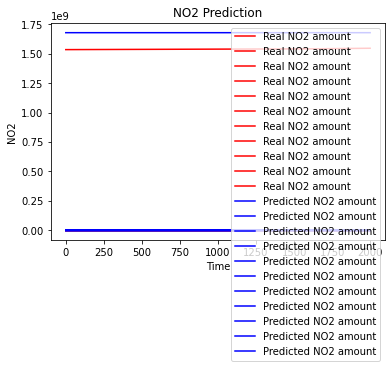

In [59]:
plt.figure()
plt.plot(test_data, color='red', label = 'Real NO2 amount')
plt.plot(predicted, color='blue', label = 'Predicted NO2 amount')
plt.title('NO2 Prediction')
plt.xlabel('Time')
plt.ylabel('NO2')
plt.legend()
plt.show()

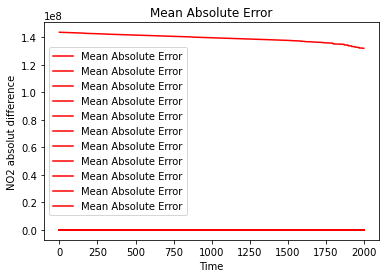

In [60]:
plt.figure()
plt.plot(np.abs(test_data - predicted), color='red', label = 'Mean Absolute Error')
plt.title('Mean Absolute Error')
plt.xlabel('Time')
plt.ylabel('NO2 absolut difference')
plt.legend()
plt.show()